<h1>Manual Threading vs ThreadPoolExecutor (Apache-style)<h1>


Running with 1000 workers...
Manual threading - 1000 workers: 0.2411 sec
Thread pool      - 1000 workers: 0.1395 sec

Running with 2000 workers...
Manual threading - 2000 workers: 0.6268 sec
Thread pool      - 2000 workers: 0.2657 sec

Running with 4000 workers...
Manual threading - 4000 workers: 1.0854 sec
Thread pool      - 4000 workers: 0.4882 sec

Running with 6000 workers...
Manual threading - 6000 workers: 1.4797 sec
Thread pool      - 6000 workers: 0.7838 sec

Running with 8000 workers...
Manual threading - 8000 workers: 2.4146 sec
Thread pool      - 8000 workers: 1.1015 sec

Running with 10000 workers...
Manual threading - 10000 workers: 2.6511 sec
Thread pool      - 10000 workers: 1.2898 sec


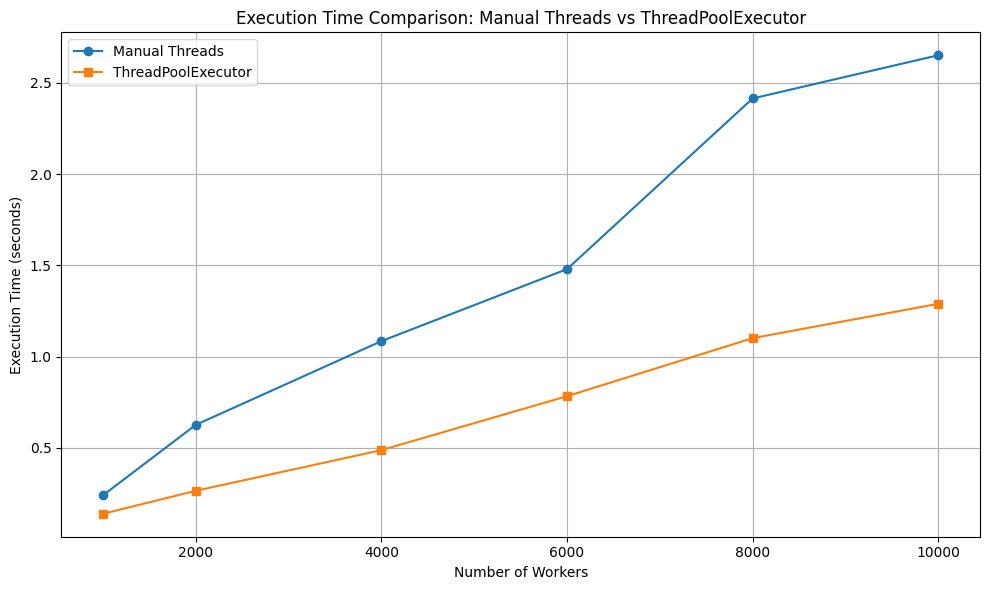

In [2]:
import threading
import time
from concurrent.futures import ThreadPoolExecutor
import matplotlib.pyplot as plt

SLEEP_TIME = 0.01  # Simulated task duration in seconds
WORKER_COUNTS = [1000, 2000, 4000, 6000, 8000, 10000]

def worker():
    time.sleep(SLEEP_TIME)

def run_with_manual_threads(num_workers):
    threads = []
    for _ in range(num_workers):
        t = threading.Thread(target=worker)
        threads.append(t)
        t.start()
    for t in threads:
        t.join()

def run_with_thread_pool(num_workers):
    with ThreadPoolExecutor(max_workers=100) as executor:
        futures = [executor.submit(worker) for _ in range(num_workers)]
        for future in futures:
            future.result()

if __name__ == "__main__":
    manual_times = []
    pool_times = []

    for num in WORKER_COUNTS:
        print(f"\nRunning with {num} workers...")

        # Manual threading model
        start = time.time()
        run_with_manual_threads(num)
        end = time.time()
        manual_time = end - start
        manual_times.append(manual_time)
        print(f"Manual threading - {num} workers: {manual_time:.4f} sec")

        # Thread pool model
        start = time.time()
        run_with_thread_pool(num)
        end = time.time()
        pool_time = end - start
        pool_times.append(pool_time)
        print(f"Thread pool      - {num} workers: {pool_time:.4f} sec")

    # Plotting results
    plt.figure(figsize=(10, 6))
    plt.plot(WORKER_COUNTS, manual_times, label="Manual Threads", marker='o')
    plt.plot(WORKER_COUNTS, pool_times, label="ThreadPoolExecutor", marker='s')
    plt.xlabel("Number of Workers")
    plt.ylabel("Execution Time (seconds)")
    plt.title("Execution Time Comparison: Manual Threads vs ThreadPoolExecutor")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


<h1>Manual Threading vs Task Queue with Load Balancing<h1>


Running with 1000 tasks...
Manual threading - 1000 tasks: 0.2188 sec
Task queue       - 1000 tasks: 0.1296 sec

Running with 2000 tasks...
Manual threading - 2000 tasks: 0.6601 sec
Task queue       - 2000 tasks: 0.2437 sec

Running with 4000 tasks...
Manual threading - 4000 tasks: 1.0215 sec
Task queue       - 4000 tasks: 0.4674 sec

Running with 6000 tasks...
Manual threading - 6000 tasks: 1.4457 sec
Task queue       - 6000 tasks: 0.6890 sec

Running with 8000 tasks...
Manual threading - 8000 tasks: 1.9636 sec
Task queue       - 8000 tasks: 0.9110 sec

Running with 10000 tasks...
Manual threading - 10000 tasks: 2.4444 sec
Task queue       - 10000 tasks: 1.1285 sec


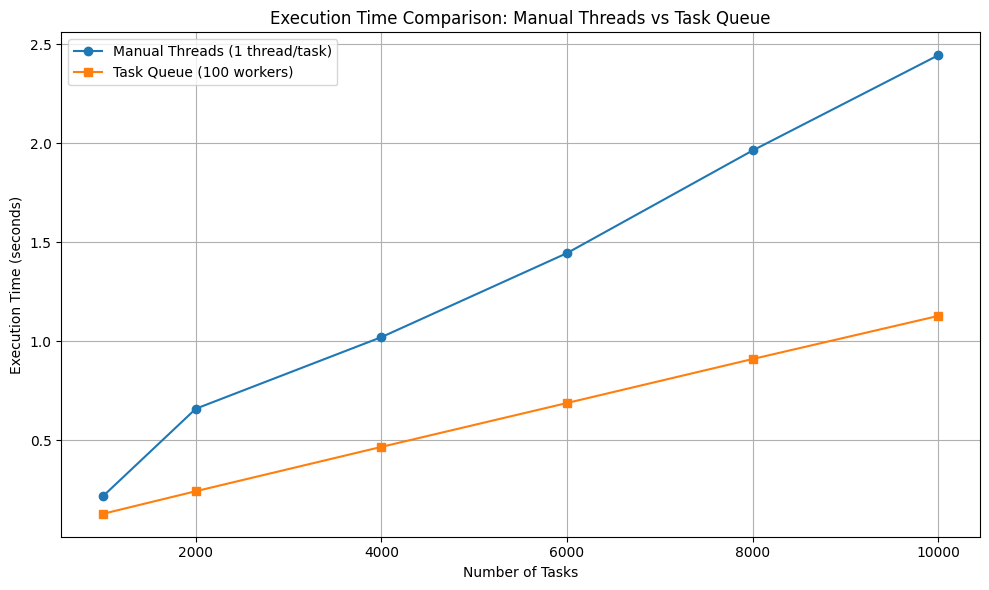

In [3]:
import threading
import time
import queue
import matplotlib.pyplot as plt

SLEEP_TIME = 0.01
NUM_WORKERS = 100
TASK_COUNTS = [1000, 2000, 4000, 6000, 8000, 10000]

def worker_task():
    time.sleep(SLEEP_TIME)

# Model 1: Each thread runs a single task
def run_with_manual_threads(num_tasks):
    threads = []
    for _ in range(num_tasks):
        t = threading.Thread(target=worker_task)
        threads.append(t)
        t.start()
    for t in threads:
        t.join()

# Model 2: Fixed worker threads pull tasks from a queue
def run_with_task_queue(num_tasks):
    task_queue = queue.Queue()

    # Fill the queue with tasks
    for _ in range(num_tasks):
        task_queue.put(worker_task)

    def worker():
        while not task_queue.empty():
            try:
                task = task_queue.get_nowait()
                task()
                task_queue.task_done()
            except queue.Empty:
                break

    threads = []
    for _ in range(NUM_WORKERS):
        t = threading.Thread(target=worker)
        threads.append(t)
        t.start()

    for t in threads:
        t.join()

if __name__ == "__main__":
    manual_times = []
    queue_times = []

    for num_tasks in TASK_COUNTS:
        print(f"\nRunning with {num_tasks} tasks...")

        # Manual threading
        start = time.time()
        run_with_manual_threads(num_tasks)
        end = time.time()
        manual_time = end - start
        manual_times.append(manual_time)
        print(f"Manual threading - {num_tasks} tasks: {manual_time:.4f} sec")

        # Task queue
        start = time.time()
        run_with_task_queue(num_tasks)
        end = time.time()
        queue_time = end - start
        queue_times.append(queue_time)
        print(f"Task queue       - {num_tasks} tasks: {queue_time:.4f} sec")

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(TASK_COUNTS, manual_times, label="Manual Threads (1 thread/task)", marker='o')
    plt.plot(TASK_COUNTS, queue_times, label="Task Queue (100 workers)", marker='s')
    plt.xlabel("Number of Tasks")
    plt.ylabel("Execution Time (seconds)")
    plt.title("Execution Time Comparison: Manual Threads vs Task Queue")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


<h1>Manual Threading vs Asyncio (Event Loop for I/O-bound Tasks)<h1>


Running with 1000 tasks...
Manual threading - 1000 tasks: 0.2415 sec
Asyncio          - 1000 tasks: 0.0329 sec

Running with 2000 tasks...
Manual threading - 2000 tasks: 0.4680 sec
Asyncio          - 2000 tasks: 0.1793 sec

Running with 4000 tasks...
Manual threading - 4000 tasks: 0.9080 sec
Asyncio          - 4000 tasks: 0.2395 sec

Running with 6000 tasks...
Manual threading - 6000 tasks: 1.5165 sec
Asyncio          - 6000 tasks: 0.4575 sec

Running with 8000 tasks...
Manual threading - 8000 tasks: 2.2777 sec
Asyncio          - 8000 tasks: 0.3920 sec

Running with 10000 tasks...
Manual threading - 10000 tasks: 2.8759 sec
Asyncio          - 10000 tasks: 0.6614 sec


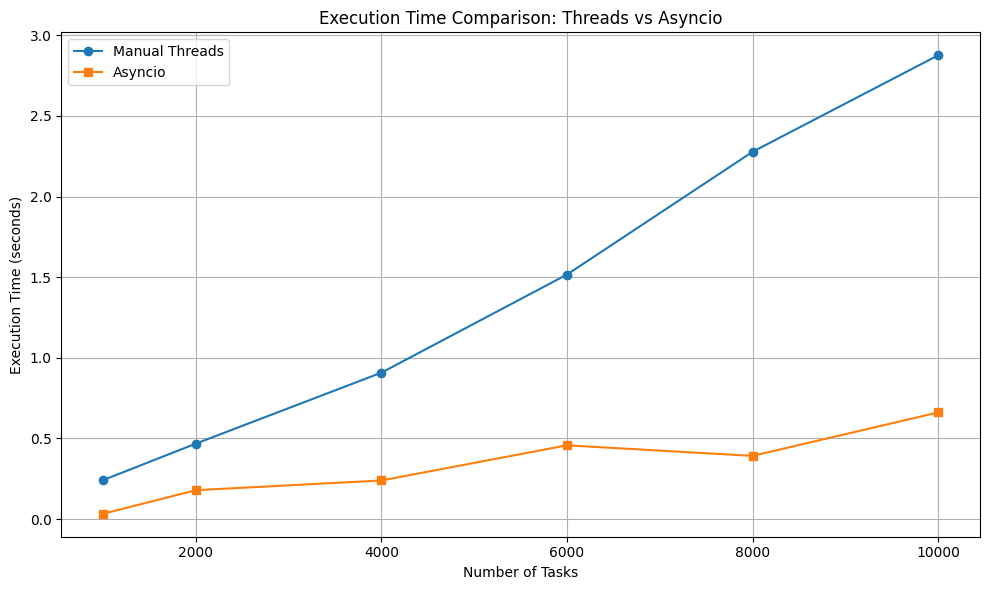

In [6]:
import threading
import asyncio
import time
import matplotlib.pyplot as plt
import nest_asyncio
nest_asyncio.apply()

SLEEP_TIME = 0.01
TASK_COUNTS = [1000, 2000, 4000, 6000, 8000, 10000]

# --- Manual threading ---
def run_with_threads(num_tasks):
    def thread_worker():
        time.sleep(SLEEP_TIME)

    threads = []
    for _ in range(num_tasks):
        t = threading.Thread(target=thread_worker)
        threads.append(t)
        t.start()
    for t in threads:
        t.join()

# --- Asyncio ---
async def async_worker():
    await asyncio.sleep(SLEEP_TIME)

async def run_with_asyncio(num_tasks):
    tasks = [async_worker() for _ in range(num_tasks)]
    await asyncio.gather(*tasks)


async def benchmark_models():
    thread_times = []
    asyncio_times = []

    for num_tasks in TASK_COUNTS:
        print(f"\nRunning with {num_tasks} tasks...")

        # Manual threads
        start = time.time()
        run_with_threads(num_tasks)
        end = time.time()
        thread_time = end - start
        thread_times.append(thread_time)
        print(f"Manual threading - {num_tasks} tasks: {thread_time:.4f} sec")

        # Asyncio
        start = time.time()
        await run_with_asyncio(num_tasks)
        end = time.time()
        async_time = end - start
        asyncio_times.append(async_time)
        print(f"Asyncio          - {num_tasks} tasks: {async_time:.4f} sec")

    return thread_times, asyncio_times

# --- Plotting ---
def plot_results(thread_times, asyncio_times):
    plt.figure(figsize=(10, 6))
    plt.plot(TASK_COUNTS, thread_times, label="Manual Threads", marker='o')
    plt.plot(TASK_COUNTS, asyncio_times, label="Asyncio", marker='s')
    plt.xlabel("Number of Tasks")
    plt.ylabel("Execution Time (seconds)")
    plt.title("Execution Time Comparison: Threads vs Asyncio")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


thread_times, asyncio_times = await benchmark_models()
plot_results(thread_times, asyncio_times)


<h1>Threading + Requests vs Asyncio + Aiohttp (Network I/O)<h1>


🔹 Running with 5 requests...
Threading        - 5 requests: 0.13 sec
Asyncio + aiohttp - 5 requests: 0.13 sec

🔹 Running with 10 requests...
Threading        - 10 requests: 0.13 sec
Asyncio + aiohttp - 10 requests: 0.14 sec

🔹 Running with 20 requests...
Threading        - 20 requests: 0.15 sec
Asyncio + aiohttp - 20 requests: 0.17 sec

🔹 Running with 40 requests...
Threading        - 40 requests: 0.28 sec
Asyncio + aiohttp - 40 requests: 0.25 sec

🔹 Running with 60 requests...
Threading        - 60 requests: 0.40 sec
Asyncio + aiohttp - 60 requests: 0.31 sec

🔹 Running with 80 requests...
Threading        - 80 requests: 0.51 sec
Asyncio + aiohttp - 80 requests: 0.39 sec

🔹 Running with 100 requests...
Threading        - 100 requests: 0.62 sec
Asyncio + aiohttp - 100 requests: 0.48 sec


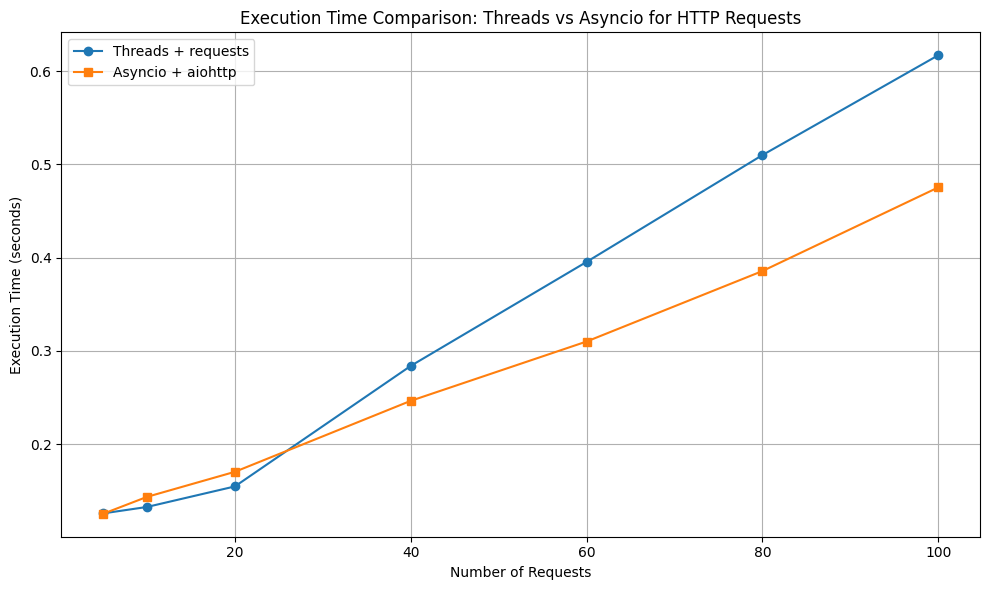

In [9]:
import threading
import time
import requests
import asyncio
import aiohttp
import matplotlib.pyplot as plt

# فقط در Jupyter یا Colab لازم است
import nest_asyncio
nest_asyncio.apply()

URL = "https://httpbin.org/delay/1"  # یک ثانیه تأخیر مصنوعی
TASK_COUNTS = [5, 10, 20, 40, 60, 80, 100]  # تعداد مختلف درخواست‌ها برای تست

# --- Synchronous download using threading ---
def sync_download(num_tasks):
    def fetch():
        try:
            _ = requests.get(URL)
        except Exception as e:
            print(f"Request failed: {e}")

    threads = []
    for _ in range(num_tasks):
        t = threading.Thread(target=fetch)
        threads.append(t)
        t.start()
    for t in threads:
        t.join()

# --- Asynchronous download using aiohttp ---
async def async_download(num_tasks):
    async def fetch(session):
        try:
            async with session.get(URL) as response:
                await response.text()
        except Exception as e:
            print(f"Async request failed: {e}")

    async with aiohttp.ClientSession() as session:
        tasks = [fetch(session) for _ in range(num_tasks)]
        await asyncio.gather(*tasks)

# --- Benchmark both models ---
async def benchmark_models():
    thread_times = []
    async_times = []

    for num_tasks in TASK_COUNTS:
        print(f"\n🔹 Running with {num_tasks} requests...")

        # Threading + requests
        start = time.time()
        sync_download(num_tasks)
        end = time.time()
        thread_time = end - start
        thread_times.append(thread_time)
        print(f"Threading        - {num_tasks} requests: {thread_time:.2f} sec")

        # Asyncio + aiohttp
        start = time.time()
        await async_download(num_tasks)
        end = time.time()
        async_time = end - start
        async_times.append(async_time)
        print(f"Asyncio + aiohttp - {num_tasks} requests: {async_time:.2f} sec")

    return thread_times, async_times

# --- Plot results ---
def plot_results(thread_times, async_times):
    plt.figure(figsize=(10, 6))
    plt.plot(TASK_COUNTS, thread_times, label="Threads + requests", marker='o')
    plt.plot(TASK_COUNTS, async_times, label="Asyncio + aiohttp", marker='s')
    plt.xlabel("Number of Requests")
    plt.ylabel("Execution Time (seconds)")
    plt.title("Execution Time Comparison: Threads vs Asyncio for HTTP Requests")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Run everything ---
thread_times, async_times = await benchmark_models()
plot_results(thread_times, async_times)
